# Really?? Real World Smartphone's

### Data Information:

This dataset provides a comprehensive collection of information about all the latest smartphones available in the market as of the current time. The dataset was created by web scraping reputable online sources to gather accurate and up-to-date information about various smartphone models, their specifications, features, and pricing.

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm


# Read Dataset

In [2]:
p_df = pd.read_csv('smartphones.csv')
p_df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


# Data Understanding

Gather informations that would make some use in the given dataset.

In [38]:
p_df.shape

(980, 22)

In [39]:
p_df.columns

Index(['brand_name', 'model', 'price', 'avg_rating', '5G_or_not',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'os', 'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'resolution_height', 'resolution_width'],
      dtype='object')

In [40]:
p_df.dtypes

brand_name                    object
model                         object
price                          int64
avg_rating                   float64
5G_or_not                      int64
processor_brand               object
num_cores                    float64
processor_speed              float64
battery_capacity             float64
fast_charging_available        int64
fast_charging                float64
ram_capacity                   int64
internal_memory                int64
screen_size                  float64
refresh_rate                   int64
num_rear_cameras               int64
os                            object
primary_camera_rear          float64
primary_camera_front         float64
extended_memory_available      int64
resolution_height              int64
resolution_width               int64
dtype: object

In [41]:
p_df.describe()

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.000000,879.000000,980.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,975.000000,980.000000,980.000000,980.000000
mean,32520.504082,7.825825,0.560204,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,50.319286,16.589744,0.630612,2214.663265,1075.852041
std,39531.812669,0.740285,0.496616,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,33.000968,10.876944,0.482885,516.484254,290.164931
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,12999.000000,7.400000,0.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,19994.500000,8.000000,1.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,35491.500000,8.400000,1.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,650000.000000,8.900000,1.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


# Data Preparation

* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns
* Feature Creation

In [3]:
p_df = p_df[['brand_name', 'model', 'price', 'avg_rating', '5G_or_not', 'battery_capacity',
       'fast_charging_available', 'ram_capacity',
       'internal_memory', 'refresh_rate',
       'os', 'extended_memory_available']].copy()
p_df

,brand_name,model,price,avg_rating,5G_or_not,battery_capacity,fast_charging_available,ram_capacity,internal_memory,refresh_rate,os,extended_memory_available
0,apple,Apple iPhone 11,38999,7.3,0,3110.0,0,4,64,60,ios,0
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,3110.0,0,4,128,60,ios,0
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,3500.0,1,4,64,60,ios,0
3,apple,Apple iPhone 12,51999,7.4,1,NaN,0,4,64,60,ios,0
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,NaN,0,4,128,60,ios,0
...,...,...,...,...,...,...,...,...,...,...,...,...
975,xiaomi,Xiaomi Redmi Note 9 Pro,13999,7.5,0,5020.0,1,4,64,60,android,1
976,xiaomi,Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB),14439,7.7,0,5020.0,1,4,128,60,android,1
977,xiaomi,Xiaomi Redmi Note 9 Pro Max,16490,8.0,0,5020.0,1,6,64,60,android,1
978,zte,ZTE Axon 30S,19999,8.2,1,4200.0,1,6,128,120,android,1


In [11]:
#rename columns
p_df = p_df.rename(columns = {'brand_name' : 'Brand_Name', 'model' : 'Model',
                              'price' : 'Price', 'avg_rating' : 'Avg_Rating',
                              '5G_or_not' : '5G_Or_Not', 'battery_capacity' : 'Battery_Capacity',
                              'fast_charging_available' : 'Fast_Charging_Available', 'ram_capacity' : 'Ram_Capacity',
                              'internal_memory' : 'Internal_Memory', 'refresh_rate' : 'Refresh_Rate',
                              'os' : 'Operating_System', 'extended_memory_available' : 'Extended_Memory_Available' 
}).copy()
p_df

,Brand_Name,Model,Price,Avg_Rating,5G_Or_Not,Battery_Capacity,Fast_Charging_Available,Ram_Capacity,Internal_Memory,Refresh_Rate,Operating_System,Extended_Memory_Available
0,apple,Apple iPhone 11,38999,7.3,0,3110.0,0,4,64,60,ios,0
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,3110.0,0,4,128,60,ios,0
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,3500.0,1,4,64,60,ios,0
11,apple,Apple iPhone 13,62999,7.9,1,3240.0,1,4,128,60,ios,0
12,apple,Apple iPhone 13 (256GB),72999,7.9,1,3240.0,1,4,256,60,ios,0
...,...,...,...,...,...,...,...,...,...,...,...,...
975,xiaomi,Xiaomi Redmi Note 9 Pro,13999,7.5,0,5020.0,1,4,64,60,android,1
976,xiaomi,Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB),14439,7.7,0,5020.0,1,4,128,60,android,1
977,xiaomi,Xiaomi Redmi Note 9 Pro Max,16490,8.0,0,5020.0,1,6,64,60,android,1
978,zte,ZTE Axon 30S,19999,8.2,1,4200.0,1,6,128,120,android,1


Check the dataset if there is some presence of NaN values

In [12]:
p_df.isna().sum()

Brand_Name                   0
Model                        0
Price                        0
Avg_Rating                   0
5G_Or_Not                    0
Battery_Capacity             0
Fast_Charging_Available      0
Ram_Capacity                 0
Internal_Memory              0
Refresh_Rate                 0
Operating_System             0
Extended_Memory_Available    0
dtype: int64

In [13]:
p_df = p_df.dropna()

In [14]:
p_df.duplicated()

0      False
1      False
2      False
11     False
12     False
       ...  
975    False
976    False
977    False
978    False
979    False
Length: 860, dtype: bool

In [15]:
p_df.loc[p_df.duplicated()]

,Brand_Name,Model,Price,Avg_Rating,5G_Or_Not,Battery_Capacity,Fast_Charging_Available,Ram_Capacity,Internal_Memory,Refresh_Rate,Operating_System,Extended_Memory_Available


In [19]:
p_df.loc[p_df.duplicated(subset = ['Model'])].head()

,Brand_Name,Model,Price,Avg_Rating,5G_Or_Not,Battery_Capacity,Fast_Charging_Available,Ram_Capacity,Internal_Memory,Refresh_Rate,Operating_System,Extended_Memory_Available


The results indicates that there is no duplicated values in the dataset given but there still a NaN value that needs to be clean.

In [24]:
p_df = p_df.loc[~p_df.duplicated(subset=['Brand_Name','Model','Avg_Rating'])] \
    .reset_index(drop=True).copy()

# Feature Understanding
### (Univariate analysis)
* Plotting Feature Distributions
* Histogram
* KDE
* Boxplot

In [51]:
p_df.head()

,Brand_Name,Model,Price,Avg_Rating,5G_Or_Not,Battery_Capacity,Fast_Charging_Available,Ram_Capacity,Internal_Memory,Refresh_Rate,Operating_System,Extended_Memory_Available
0,apple,Apple iPhone 11,38999,7.3,0,3110.0,0,4,64,60,ios,0
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,3110.0,0,4,128,60,ios,0
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,3500.0,1,4,64,60,ios,0
3,apple,Apple iPhone 13,62999,7.9,1,3240.0,1,4,128,60,ios,0
4,apple,Apple iPhone 13 (256GB),72999,7.9,1,3240.0,1,4,256,60,ios,0


In [55]:
p_df['Price'].value_counts().head(10)

14999    20
19990    17
11999    17
19999    16
16999    16
17999    15
13999    15
15999    15
12999    14
29990    14
Name: Price, dtype: int64

Text(0.5, 0, 'Price Range')

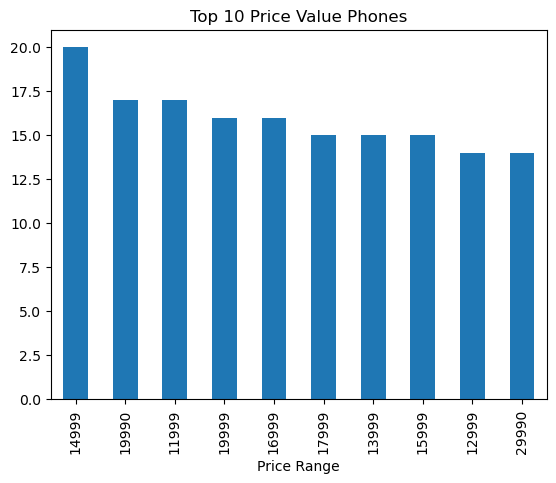

In [29]:
#plot data
axis = p_df['Price'].value_counts().head(10).plot(kind = 'bar', title = 'Top 10 Price Value Phones')
axis.set_xlabel('Price Range')

Text(0.5, 0, 'Ratings')

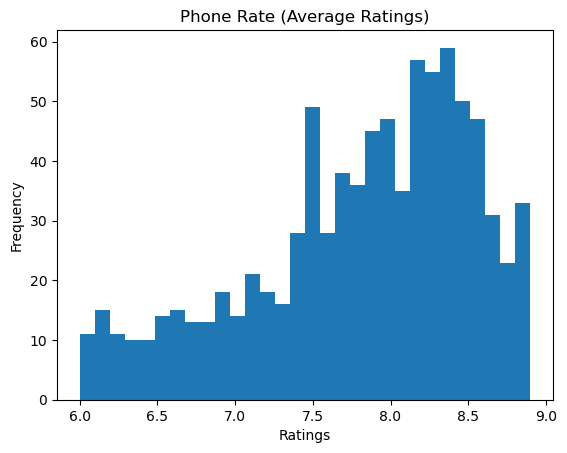

In [32]:
axis = p_df['Avg_Rating'].plot(kind = 'hist', bins = 30, title = 'Phone Rate (Average Ratings)')
axis.set_xlabel('Ratings')

Text(0.5, 0, 'Ratings')

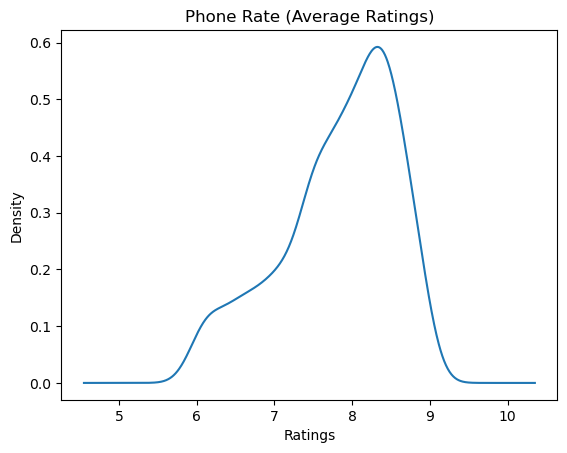

In [62]:
#check data for kernel density
axis = p_df['Avg_Rating'].plot(kind = 'kde', title = 'Phone Rate (Average Ratings)')
axis.set_xlabel('Ratings')

In [64]:
p_df['Fast_Charging_Available'].value_counts()

1    764
0     96
Name: Fast_Charging_Available, dtype: int64

# Relationship Features
* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby comparisons

In [68]:
p_df.head()

,Brand_Name,Model,Price,Avg_Rating,5G_Or_Not,Battery_Capacity,Fast_Charging_Available,Ram_Capacity,Internal_Memory,Refresh_Rate,Operating_System,Extended_Memory_Available
0,apple,Apple iPhone 11,38999,7.3,0,3110.0,0,4,64,60,ios,0
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,3110.0,0,4,128,60,ios,0
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,3500.0,1,4,64,60,ios,0
3,apple,Apple iPhone 13,62999,7.9,1,3240.0,1,4,128,60,ios,0
4,apple,Apple iPhone 13 (256GB),72999,7.9,1,3240.0,1,4,256,60,ios,0


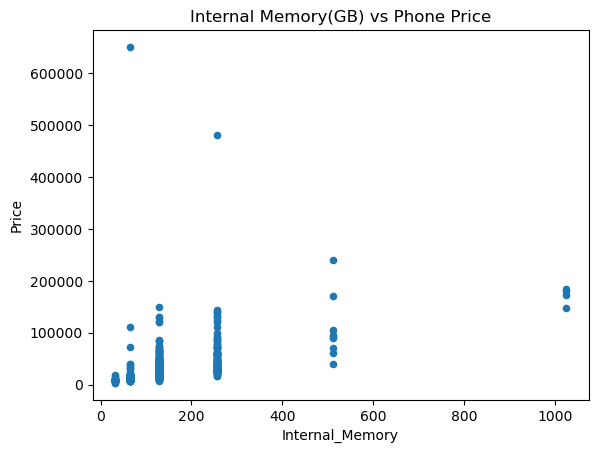

In [80]:
p_df.plot(kind = 'scatter', x = 'Internal_Memory', y = 'Price', title = 'Internal Memory(GB) vs Phone Price')
plt.show()

Check brand name in terms of price versus internal storage.

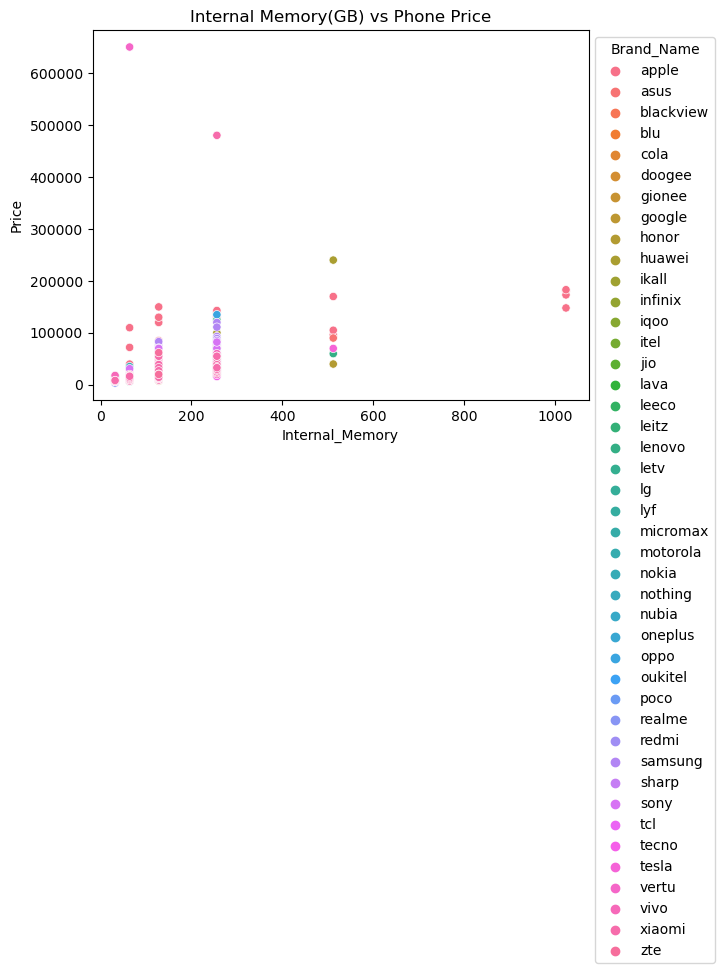

In [21]:
axis = sns.scatterplot(x = 'Internal_Memory', y = 'Price', hue = 'Brand_Name', data = p_df)
sns.move_legend(axis, "upper left", bbox_to_anchor=(1, 1))
axis.set_title('Internal Memory(GB) vs Phone Price')
plt.show()

Check the ram storage storage in terms of price versus internal storage.

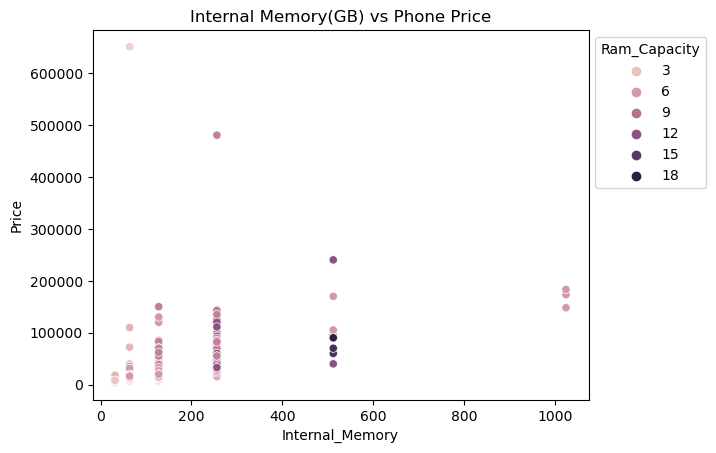

In [34]:
axis = sns.scatterplot(x = 'Internal_Memory', y = 'Price', hue = 'Ram_Capacity', data = p_df)
sns.move_legend(axis, "upper left", bbox_to_anchor=(1, 1))
axis.set_title('Internal Memory(GB) vs Phone Price')
plt.show()

Result shows that there are phones that are overpriced but only haved a small amount of ram capacity.

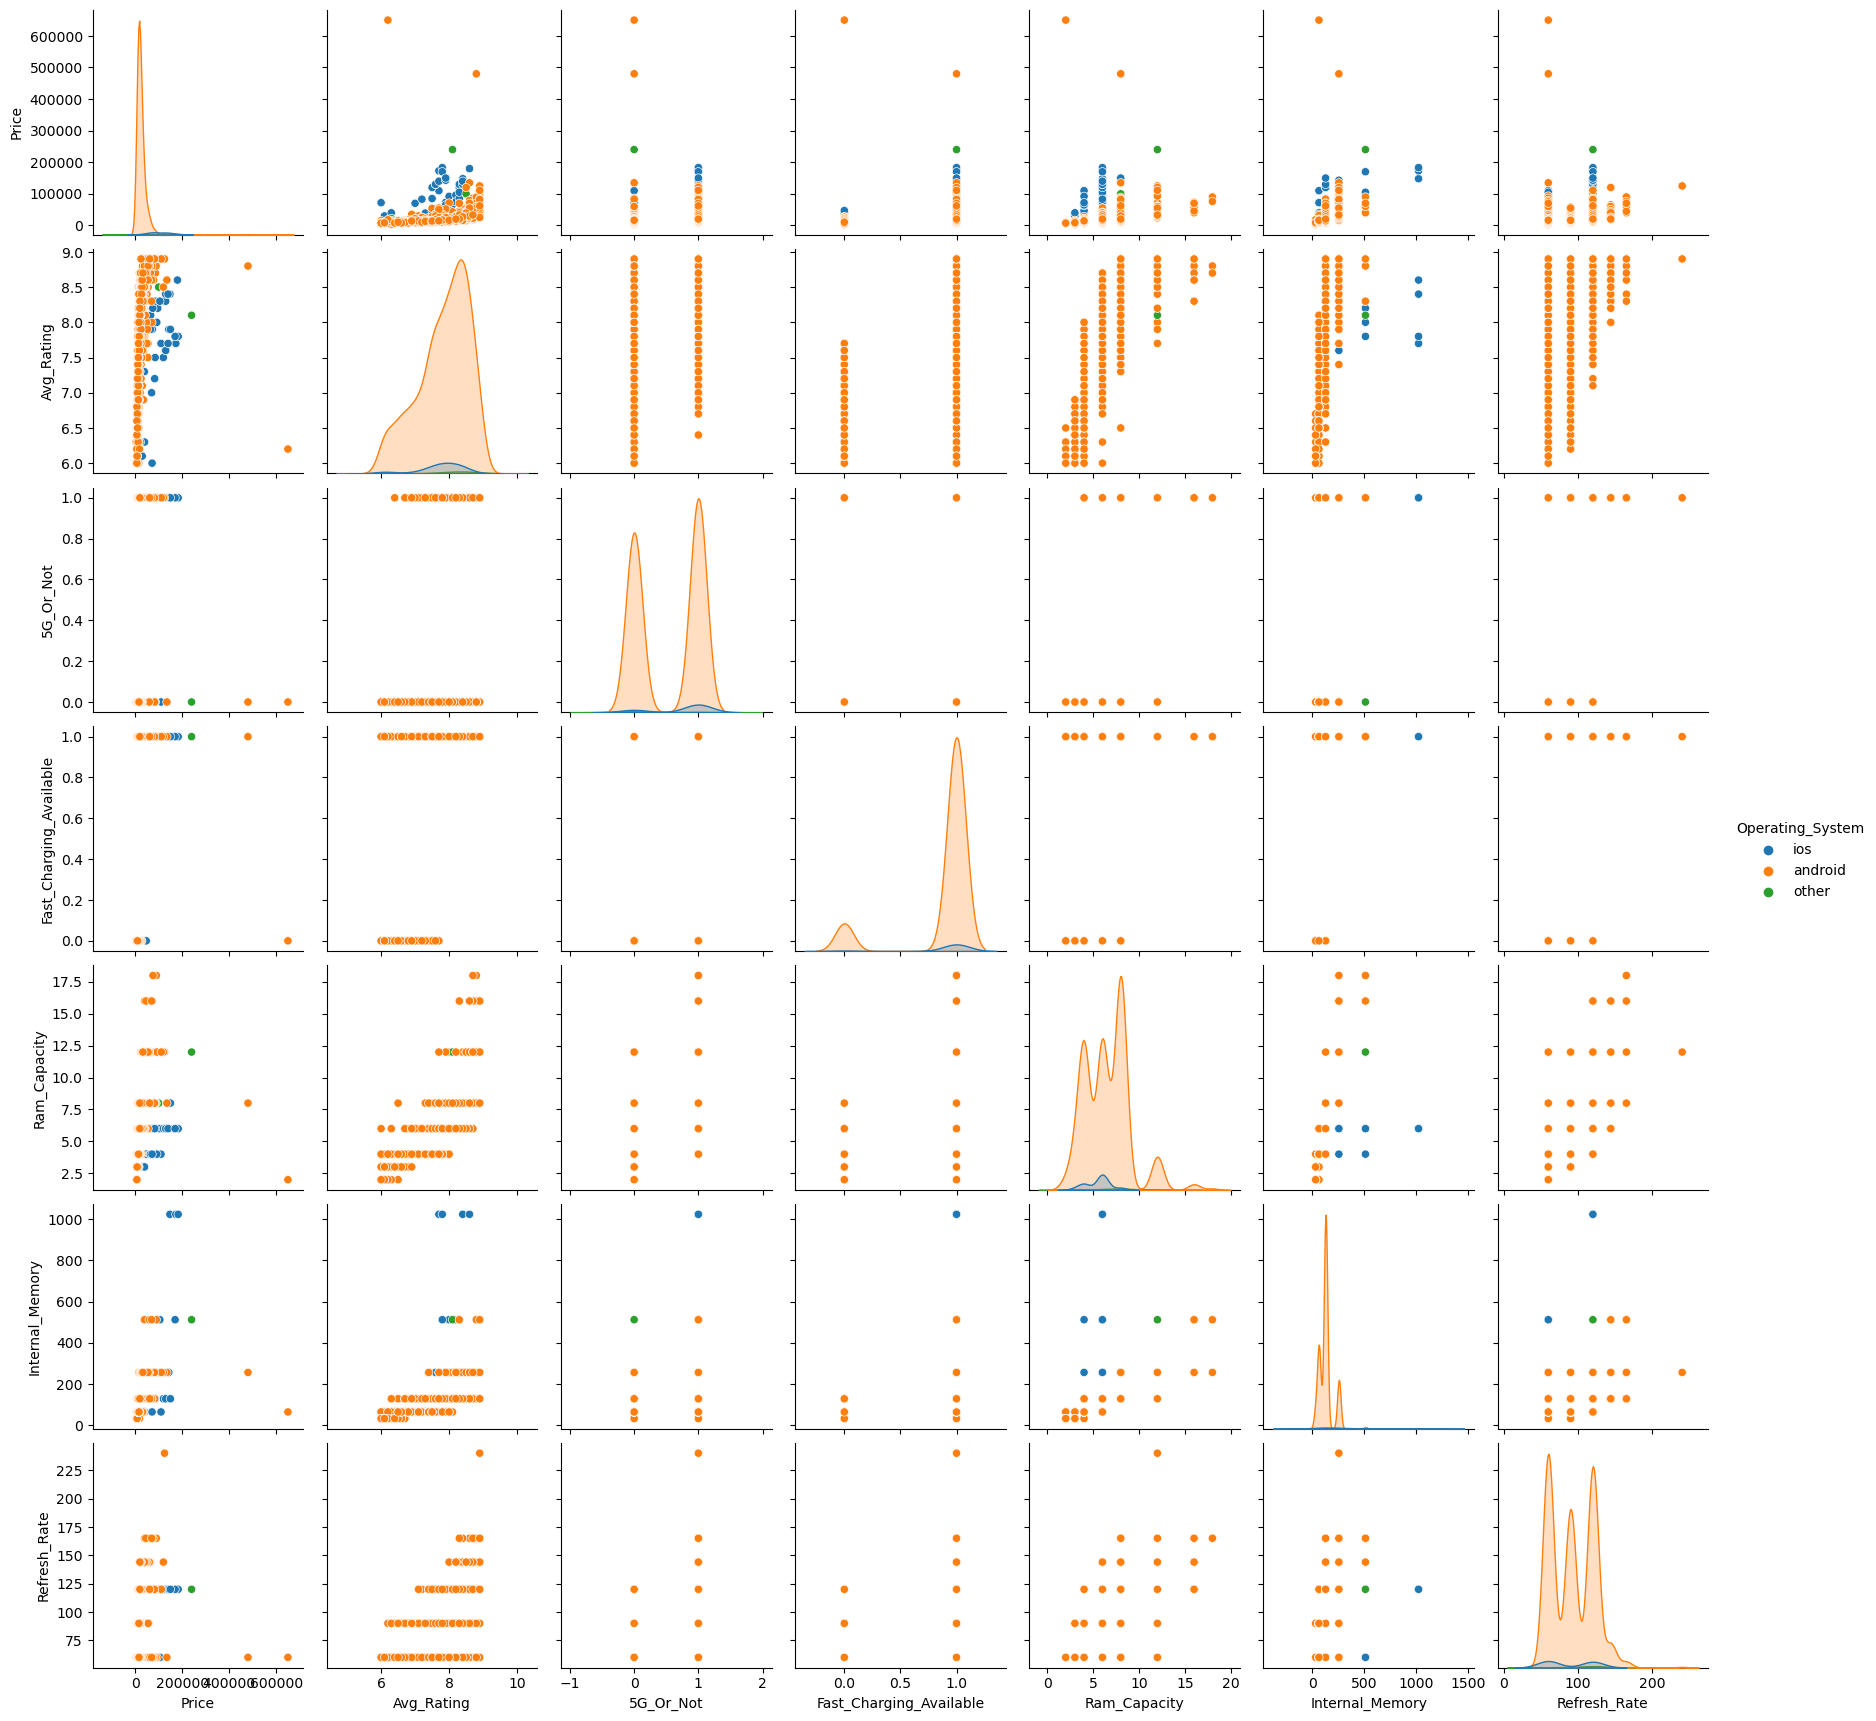

In [83]:
sns.pairplot(p_df, vars = ['Price', 'Avg_Rating', '5G_Or_Not', 'Fast_Charging_Available',
                           'Ram_Capacity', 'Internal_Memory', 'Refresh_Rate'], hue = 'Operating_System') 

This plots shows that the Android Operating System dominates its other OS in terms of device features.

In [85]:
p_corr = p_df[['Price', 'Avg_Rating', '5G_Or_Not', 'Fast_Charging_Available',
                           'Ram_Capacity', 'Internal_Memory', 'Refresh_Rate']].corr()
p_corr

,Price,Avg_Rating,5G_Or_Not,Fast_Charging_Available,Ram_Capacity,Internal_Memory,Refresh_Rate
Price,1.000000,0.278170,0.227672,0.105943,0.269976,0.473368,0.215808
Avg_Rating,0.278170,1.000000,0.607935,0.566269,0.759472,0.486128,0.617704
5G_Or_Not,0.227672,0.607935,1.000000,0.347357,0.490986,0.370236,0.611160
Fast_Charging_Available,0.105943,0.566269,0.347357,1.000000,0.367611,0.247538,0.351755
Ram_Capacity,0.269976,0.759472,0.490986,0.367611,1.000000,0.531190,0.529221
Internal_Memory,0.473368,0.486128,0.370236,0.247538,0.531190,1.000000,0.355232
Refresh_Rate,0.215808,0.617704,0.611160,0.351755,0.529221,0.355232,1.000000


<Axes: >

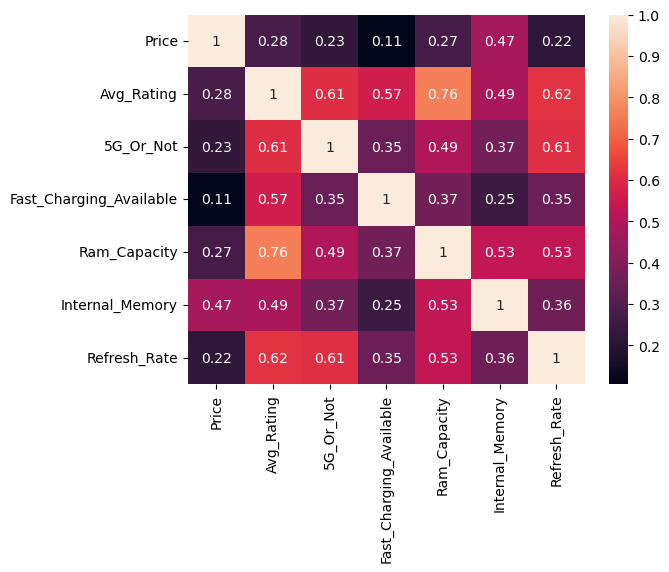

In [86]:
sns.heatmap(p_corr, annot = True)

The Internal memory has a higher correlation between the price. It indicates that if the higher the storage is set it reflect also with its price value.

# Ask Questions about the data

* What phone has a highest rating(Maximum 10)?
* What phone has a highest Refresh rate(Maximum 10)?
* What is the highest price of smartphone brand(Maximum 10)?

Text(0.5, 0, 'Average Rating')

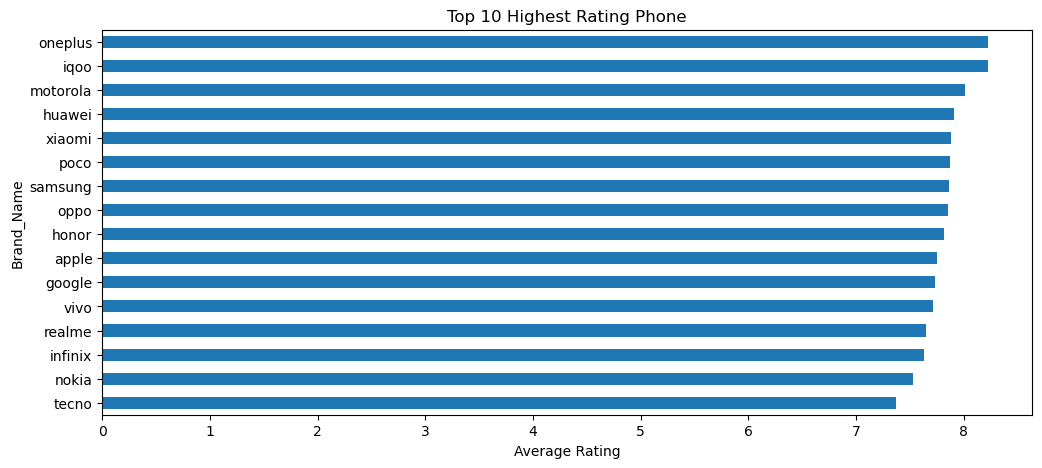

In [138]:
axis = p_df.query('Brand_Name != "Other"').groupby('Brand_Name')['Avg_Rating'].agg(['mean', 'count']).query('count >= 10') \
       .sort_values('mean')['mean'].plot(kind = 'barh', figsize = (12, 5), title = 'Top 10 Highest Rating Phone')
axis.set_xlabel('Average Rating')

Text(0.5, 0, 'Refresh Rate')

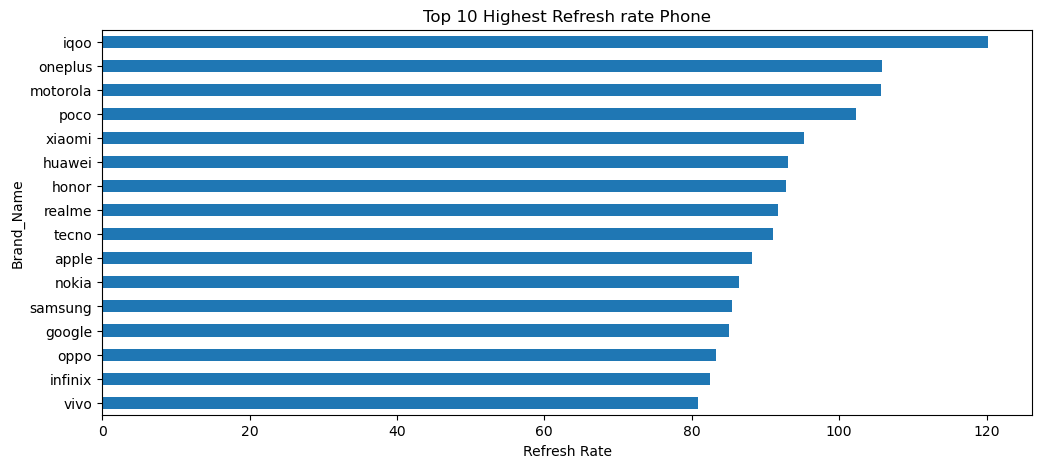

In [139]:
axis = p_df.query('Brand_Name != "Other"').groupby('Brand_Name')['Refresh_Rate'].agg(['mean', 'count']).query('count >= 10') \
       .sort_values('mean')['mean'].plot(kind = 'barh', figsize = (12, 5), title = 'Top 10 Highest Refresh rate Phone')
axis.set_xlabel('Refresh Rate')

Text(0.5, 0, 'Price')

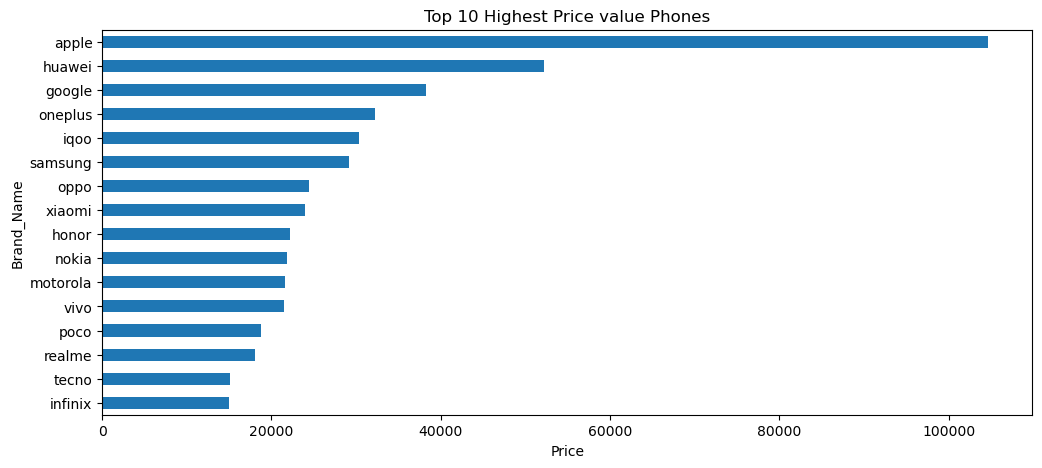

In [40]:
axis = p_df.query('Brand_Name != "Other"').groupby('Brand_Name')['Price'].agg(['mean', 'count']).query('count >= 10') \
       .sort_values('mean')['mean'].plot(kind = 'barh', figsize = (12, 5), title = 'Top 10 Highest Price value Phones')
axis.set_xlabel('Price')

# Train and Test

need to split our variables into training and testing sets. Using the training set, we’ll build the model and perform the model on the testing set. We’ll divide the training and testing sets into a 7:3 ratio, respectively.

In [87]:
p_df.head()

,Brand_Name,Model,Price,Avg_Rating,5G_Or_Not,Battery_Capacity,Fast_Charging_Available,Ram_Capacity,Internal_Memory,Refresh_Rate,Operating_System,Extended_Memory_Available
0,apple,Apple iPhone 11,38999,7.3,0,3110.0,0,4,64,60,ios,0
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,3110.0,0,4,128,60,ios,0
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,3500.0,1,4,64,60,ios,0
3,apple,Apple iPhone 13,62999,7.9,1,3240.0,1,4,128,60,ios,0
4,apple,Apple iPhone 13 (256GB),72999,7.9,1,3240.0,1,4,256,60,ios,0


In [88]:
# Splitting the varaibles as training and testing
X = p_df['Avg_Rating']
y = p_df['Refresh_Rate']

X_train, X_test, Y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 64)

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
X_train_sm

,const,Avg_Rating
353,1.0,8.5
830,1.0,7.9
487,1.0,6.6
544,1.0,8.2
815,1.0,8.0
...,...,...
819,1.0,8.1
54,1.0,8.6
166,1.0,8.7
119,1.0,8.3


Once we’ve added constant, we can fit the regression line using OLS (Ordinary Least Square) method present in the statsmodel. After that, we’ll see the parameters,c and m of the straight line.

In [89]:
p_df_cor = p_df.corr().round(2)
p_df_cor.head()

C:\Users\ATARA\AppData\Local\Temp\ipykernel_10132\259174203.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p_df_cor = p_df.corr().round(2)


,Price,Avg_Rating,5G_Or_Not,Battery_Capacity,Fast_Charging_Available,Ram_Capacity,Internal_Memory,Refresh_Rate,Extended_Memory_Available
Price,1.00,0.28,0.23,-0.19,0.11,0.27,0.47,0.22,-0.41
Avg_Rating,0.28,1.00,0.61,-0.01,0.57,0.76,0.49,0.62,-0.42
5G_Or_Not,0.23,0.61,1.00,-0.05,0.35,0.49,0.37,0.61,-0.49
Battery_Capacity,-0.19,-0.01,-0.05,1.00,0.02,0.02,-0.05,0.04,0.20
Fast_Charging_Available,0.11,0.57,0.35,0.02,1.00,0.37,0.25,0.35,-0.21


# Machine Learning using Logistic Regression(Binary Classification)

In [105]:
p_df.head()

,Brand_Name,Model,Price,Avg_Rating,5G_Or_Not,Battery_Capacity,Fast_Charging_Available,Ram_Capacity,Internal_Memory,Refresh_Rate,Operating_System,Extended_Memory_Available
0,apple,Apple iPhone 11,38999,7.3,0,3110.0,0,4,64,60,ios,0
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,3110.0,0,4,128,60,ios,0
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,3500.0,1,4,64,60,ios,0
3,apple,Apple iPhone 13,62999,7.9,1,3240.0,1,4,128,60,ios,0
4,apple,Apple iPhone 13 (256GB),72999,7.9,1,3240.0,1,4,256,60,ios,0


In [113]:
p_df = p_df.rename(columns = {'5G_Or_Not' : 'FiveG_Or_Not'},).copy()

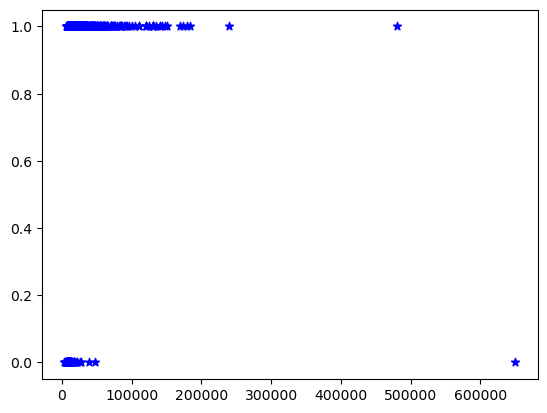

In [22]:
plt.scatter(p_df['Price'], p_df['Fast_Charging_Available'], marker = '*', color = 'blue')

Given the plot result, it seems there are few outliers in the given data but its a great news also because more phones are already have a fast charging feature.

In [24]:
X_tr, X_t, y_tr, y_t = train_test_split(p_df[['Price']], p_df.Fast_Charging_Available, train_size = 0.8, test_size = 0.2)


In [25]:
#Values for test model
X_t

,Price
77,32990
118,12999
499,6299
702,21999
124,15999
...,...
583,19990
947,15499
633,11725
971,10300


In [27]:
#values for training the model
X_tr

,Price
566,14499
576,18999
560,11999
438,10799
942,22700
...,...
297,28990
848,29990
589,24499
648,39999


In [28]:
model = LogisticRegression()

In [29]:
#training your model using fit 
model.fit(X_tr, y_tr) #ready to make predictions

LogisticRegression()

In [30]:
model.predict(X_t)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Model prediction indicates that Low price value phones has a high chance to have a fast charging feature.

In [31]:
model.score(X_t, y_t)

0.8953488372093024

In [32]:
model.predict_proba(X_t)
#the right result indicates a low chance of having a fast charging feature
#while the left result indicates a high chance of having a fast charging feature

array([[4.39262458e-02, 9.56073754e-01],
       [2.29040842e-01, 7.70959158e-01],
       [3.57060231e-01, 6.42939769e-01],
       [1.13640989e-01, 8.86359011e-01],
       [1.83344670e-01, 8.16655330e-01],
       [1.44952976e-03, 9.98550470e-01],
       [5.52324078e-05, 9.99944768e-01],
       [1.69775280e-01, 8.30224720e-01],
       [2.05998414e-01, 7.94001586e-01],
       [1.04569823e-01, 8.95430177e-01],
       [3.01659260e-01, 6.98340740e-01],
       [3.21501955e-01, 6.78498045e-01],
       [8.83981952e-02, 9.11601805e-01],
       [2.13112326e-01, 7.86887674e-01],
       [2.56480798e-01, 7.43519202e-01],
       [9.62172542e-02, 9.03782746e-01],
       [2.13112326e-01, 7.86887674e-01],
       [1.13640989e-01, 8.86359011e-01],
       [1.97740288e-01, 8.02259712e-01],
       [3.58132700e-01, 6.41867300e-01],
       [3.04242226e-01, 6.95757774e-01],
       [1.83470527e-01, 8.16529473e-01],
       [3.05429410e-01, 6.94570590e-01],
       [3.67184672e-02, 9.63281533e-01],
       [1.834705

After building a model with a score of 0.89, It successfully gives a prediction that less expensive phones in the near future would have already a fast charging feature. That would be all, Hope you find some new insights in this EDA and thank you.